In [2]:
import numpy as np

### NumPy Version

In [10]:
np.__version__

'1.19.1'

In [11]:
z = np.zeros((10, 10))
print(z.size, z.itemsize) # 요소의 개수, 각 요소의 크기 (byte)
print("{} bytes".format(z.size * z.itemsize))

100 8
800 bytes


### Quick Review

In [12]:
z = np.arange(10)
np.argsort(-z)

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [13]:
np.nonzero([1, 0, 2, 4])

(array([0, 2, 3]),)

In [14]:
z = np.random.random((10, 10))
zmin, zmax, zmean = z.min(), z.max(), z.mean()
print(zmin, zmax, zmean)

0.0045593243312496146 0.9740425751239556 0.47501896072833083


In [18]:
z = np.ones((10, 10))
z[1:-1, 1:-1] = 0
z

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

## Padding
* 배열의 크기를 고정 크기로 만드는작업

### 1D Array Padding

In [22]:
a = [1, 2, 3]
np.pad(a, 1, constant_values=0) # 좌우에 0이 채워짐
np.pad(a, (2, 3), constant_values=0) # 좌 2개, 우 3개 0으로 채워짐
np.pad(a, (0, 3), constant_values=0) # 우 3개 0으로 채워짐

array([1, 2, 3, 0, 0, 0])

### 2D Array Padding

In [24]:
b = np.arange(1, 7).reshape(2, -1)
b

array([[1, 2, 3],
       [4, 5, 6]])

In [34]:
np.pad(b, 1, constant_values=0) # 두께 1 테두리가 0으로 채워짐
np.pad(b, pad_width=1, constant_values=0)
np.pad(b, pad_width=1) # default constant_values == 0
np.pad(b, ((1, 2), (3, 4)), constant_values=0) # ((N, S),(W, E))

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 2, 3, 0, 0, 0, 0],
       [0, 0, 0, 4, 5, 6, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [63]:
c = [
    [1, 2],
    [4, 5, 6],
    [7]
]

#np.array(c, dtype=object) # list -> array

In [65]:
def two_D_array(c, fixedLength, paddingValue):
    rows = []
    for row in c:
        #rows.append(np.pad(row, (0, fixedLength), constant_values=paddingValue)[:fixedLength])
        rows.append(np.pad(row, (0, fixedLength - len(row)), constant_values=paddingValue))
        
    return np.concatenate(rows, axis=0).reshape(-1, 5) # NumPy 배열을 하나로 합침
    
    
c = two_D_array(c, fixedLength=5, paddingValue=0)

for row in c:
    print(*row)

1 2 0 0 0
4 5 6 0 0
7 0 0 0 0


In [70]:
 np.pad(np.ones((9, 9)), 1)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

## Diagonal Matrix (대각행렬)
* 주대각선 성분이 아닌 모든 성분이 0인 정사각 행렬

In [74]:
x = np.arange(9).reshape(3, 3)
np.diag(x) # 행렬에서 주대각선 성분을 리턴
np.diag(np.diag(x)) # 추출된 주대각선 성분을 이용하여 대각행렬을 생성

array([[0, 0, 0],
       [0, 4, 0],
       [0, 0, 8]])

### np.tile()

In [90]:
a = np.arange(3)
np.tile(a, 2)
np.tile(a, (2, 1))
np.tile(a, (2, 2))

array([[0, 1, 2],
       [0, 1, 2]])

In [110]:
z = np.zeros((8, 8), dtype=int)
z[::2, 1::2] = 1
z[1::2, ::2] = 1
z

array([[0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0]])

In [114]:
np.tile(np.array([[0, 1], [1, 0]]), (4, 4))

array([[0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0]])

In [116]:
a = np.arange(3).reshape(3, 1, -1)

### Standarization: 표준화

In [129]:
z = np.random.random((5, 4))
z

array([[0.62909686, 0.84189955, 0.52288138, 0.70306002],
       [0.24447306, 0.7962504 , 0.30377183, 0.62612681],
       [0.69988162, 0.63421745, 0.10112221, 0.39748131],
       [0.04842618, 0.38926363, 0.80673569, 0.5350929 ],
       [0.59355479, 0.29274586, 0.01991986, 0.69144999]])

In [139]:
np.mean(z) # mean
np.mean(z, axis=0) # column-wise mean
np.mean(z, axis=1) # row-wise mean
np.std(z) # standard deviation

0.24899359689259398

In [140]:
z - np.mean(z)

array([[ 0.13522429,  0.34802698,  0.02900881,  0.20918745],
       [-0.24939951,  0.30237783, -0.19010074,  0.13225424],
       [ 0.20600905,  0.14034488, -0.39275036, -0.09639126],
       [-0.44544639, -0.10460894,  0.31286312,  0.04122033],
       [ 0.09968222, -0.20112671, -0.47395271,  0.19757742]])

In [142]:
(z - np.mean(z)) / np.std(z)

array([[ 0.54308339,  1.39773467,  0.11650426,  0.84013186],
       [-1.0016302 ,  1.21440001, -0.76347643,  0.53115517],
       [ 0.82736684,  0.56364856, -1.57735124, -0.38712344],
       [-1.78898732, -0.42012704,  1.2565107 ,  0.16554776],
       [ 0.40034048, -0.80775857, -1.90347347,  0.79350401]])

In [144]:
z = np.arange(10, 30).reshape(4, 5)
z

array([[10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29]])

In [147]:
mean_cols = np.mean(z, axis=0)
mean_cols

array([17.5, 18.5, 19.5, 20.5, 21.5])

In [153]:
std_cols = np.std(z, axis=0)
std_cols

array([5.59016994, 5.59016994, 5.59016994, 5.59016994, 5.59016994])

In [154]:
(z - mean_cols) / std_cols

array([[-1.34164079, -1.34164079, -1.34164079, -1.34164079, -1.34164079],
       [-0.4472136 , -0.4472136 , -0.4472136 , -0.4472136 , -0.4472136 ],
       [ 0.4472136 ,  0.4472136 ,  0.4472136 ,  0.4472136 ,  0.4472136 ],
       [ 1.34164079,  1.34164079,  1.34164079,  1.34164079,  1.34164079]])

In [155]:
min_cols = np.min(z, axis=0)
max_cols = np.max(z, axis=0)

In [156]:
(z - min_cols) / (max_cols - min_cols)

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333],
       [0.66666667, 0.66666667, 0.66666667, 0.66666667, 0.66666667],
       [1.        , 1.        , 1.        , 1.        , 1.        ]])

### Dot Product: 행렬 곱셈

In [160]:
np.dot(np.ones((5, 3)), np.ones((3, 2)))
np.ones((5, 3)) @ np.ones((3, 2))

array([[3., 3.],
       [3., 3.],
       [3., 3.],
       [3., 3.],
       [3., 3.]])

### Set: 집합

In [177]:
z = np.arange(11)
z

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [168]:
np.where((z > 3) & (z < 9), -1 * z, z)

array([ 0,  1,  2,  3, -4, -5, -6, -7, -8,  9, 10])

In [179]:
cond = (z > 3) & (z < 9)
z[cond] *= -1
z

array([ 0,  1,  2,  3, -4, -5, -6, -7, -8,  9, 10])

In [217]:
z1 = np.random.randint(0, 10, 10)
z2 = np.random.randint(0, 10, 10)

print(z1, z2)

[6 5 1 2 0 9 1 4 3 3] [2 2 9 8 9 5 2 9 5 1]


In [220]:
np.intersect1d(z1, z2) #교집합

array([1, 2, 5, 9])

In [223]:
np.unique(z1)

array([0, 1, 2, 3, 4, 5, 6, 9])

In [227]:
np.union1d(z1, z2) #합집합

array([0, 1, 2, 3, 4, 5, 6, 8, 9])

In [230]:
np.in1d(z1, z2) #z1 배열의 원소를 z2 배열이 포함하고 있는 지에 대한 여부를 불린형으로 리턴

array([False,  True,  True,  True, False,  True,  True, False, False,
       False])

In [231]:
np.setdiff1d(z1, z2) # 차집합

array([0, 3, 4, 6])

In [235]:
np.setxor1d(z1, z2) # 대칭차집합 : 합집합 - 교집합 True and False , False and True

array([0, 3, 4, 6, 8])

### Logic Functions: 논리함수
* functions that compute truth values

In [237]:
a = np.arange(1, 7).reshape(2, 3)
a

array([[1, 2, 3],
       [4, 5, 6]])

In [239]:
x1 = a % 2 == 0
x1

array([[False,  True, False],
       [ True, False,  True]])

In [242]:
x2 = a >= 4
x2

array([[False, False, False],
       [ True,  True,  True]])

In [245]:
np.logical_and(x1, x2)

array([[False, False, False],
       [ True, False,  True]])

In [244]:
a[np.logical_and(x1, x2)]

array([4, 6])

In [246]:
np.sum(np.logical_and(x1, x2))

2

In [247]:
np.sum(a * np.logical_and(x1, x2))

10

### np.datetime64()

In [259]:
print(type(np.datetime64()))
print(np.datetime64('today', 'Y'))
print(np.datetime64('today', 'M'))
print(np.datetime64('today', 'D'))
print(np.datetime64('today'))

<class 'numpy.datetime64'>
2020
2020-08
2020-08-18
2020-08-18


In [262]:
print(np.datetime64('today', 'Y') - 1)
print(np.datetime64('today', 'M') - 1)
print(np.datetime64('today') - 1)

2019
2020-07
2020-08-17


### np.timedelta64()

In [266]:
np.datetime64('today', 'D') - np.timedelta64(1, 'D')

numpy.datetime64('2020-08-17')

In [274]:
np.arange('2020-08', '2020-12')

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [282]:
np.arange('2020-08', '2020-12', dtype=np.datetime64)

array(['2020-08', '2020-09', '2020-10', '2020-11'], dtype='datetime64[M]')

In [283]:
np.arange('2020-08', '2020-12', dtype='datetime64')

array(['2020-08', '2020-09', '2020-10', '2020-11'], dtype='datetime64[M]')

In [285]:
np.arange('2020-08', '2020-09', dtype='datetime64[D]')

array(['2020-08-01', '2020-08-02', '2020-08-03', '2020-08-04',
       '2020-08-05', '2020-08-06', '2020-08-07', '2020-08-08',
       '2020-08-09', '2020-08-10', '2020-08-11', '2020-08-12',
       '2020-08-13', '2020-08-14', '2020-08-15', '2020-08-16',
       '2020-08-17', '2020-08-18', '2020-08-19', '2020-08-20',
       '2020-08-21', '2020-08-22', '2020-08-23', '2020-08-24',
       '2020-08-25', '2020-08-26', '2020-08-27', '2020-08-28',
       '2020-08-29', '2020-08-30', '2020-08-31'], dtype='datetime64[D]')

In [290]:
np.arange('2020-08', '2020-12', dtype='datetime64[M]')

array(['2020-08', '2020-09', '2020-10', '2020-11'], dtype='datetime64[M]')

In [288]:
np.arange('2020-08', '2022-12', dtype='datetime64[Y]')

array(['2020', '2021'], dtype='datetime64[Y]')

### Arithmetic Operations

In [12]:
a = np.ones(3) * 1
b = np.ones(3) * 2
c = np.ones(3) * 3

In [13]:
np.add(a, b, out=b)

array([3., 3., 3.])

In [14]:
np.divide(a, 2, out=a)

array([0.5, 0.5, 0.5])

In [15]:
np.negative(a, out=a)

array([-0.5, -0.5, -0.5])

In [16]:
np.multiply(a, b, out=a)

array([-1.5, -1.5, -1.5])

### Float-related operations

In [18]:
z = np.random.uniform(0, 10, 10)
z

array([8.34538745, 7.07154935, 7.99491679, 2.94336853, 4.6482687 ,
       3.73049692, 8.03403892, 7.18215313, 0.75375678, 0.29303521])

In [19]:
z % 1

array([0.34538745, 0.07154935, 0.99491679, 0.94336853, 0.6482687 ,
       0.73049692, 0.03403892, 0.18215313, 0.75375678, 0.29303521])

In [20]:
z - z % 1

array([8., 7., 7., 2., 4., 3., 8., 7., 0., 0.])

In [21]:
np.ceil(z)

array([9., 8., 8., 3., 5., 4., 9., 8., 1., 1.])

In [22]:
np.floor(z)

array([8., 7., 7., 2., 4., 3., 8., 7., 0., 0.])

In [23]:
np.round(z)

array([8., 7., 8., 3., 5., 4., 8., 7., 1., 0.])

In [24]:
np.trunc(z)

array([8., 7., 7., 2., 4., 3., 8., 7., 0., 0.])

### np.linspace()
`np.linspace(순열시작값, 순열끝값, 샘플개수)`

In [25]:
np.linspace(start=0, stop=10, num=5)

array([ 0. ,  2.5,  5. ,  7.5, 10. ])

In [27]:
np.linspace(start=0, stop=10, num=5, endpoint=False)

array([0., 2., 4., 6., 8.])

### Python enumerate()

In [29]:
nameList = ['kim', 'lee', 'park', 'choi']
for i, name in enumerate(nameList):
    print(i, name)

0 kim
1 lee
2 park
3 choi


In [31]:
for name in enumerate(nameList):
    print(name[0], name[1])

0 kim
1 lee
2 park
3 choi


In [42]:
z = np.random.random(10)
z[np.argmax(z)] = 0
z

array([0.68554529, 0.86319996, 0.30968566, 0.        , 0.11298988,
       0.73632044, 0.75447361, 0.74753223, 0.27142966, 0.12062686])

### np.meshgrid()

In [52]:
x = np.arange(3)
y = np.arange(5)
x, y = np.meshgrid(x, y)

In [53]:
res = [list(zip(x, y)) for x, y in zip(x, y)]

In [54]:
res

[[(0, 0), (1, 0), (2, 0)],
 [(0, 1), (1, 1), (2, 1)],
 [(0, 2), (1, 2), (2, 2)],
 [(0, 3), (1, 3), (2, 3)],
 [(0, 4), (1, 4), (2, 4)]]

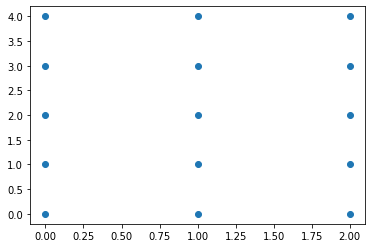

In [60]:
import matplotlib.pyplot as plt

plt.scatter(x, y)

In [97]:
z = np.arange(100)
v = np.random.uniform(0, 100)
v

68.02361037609947

In [98]:
z[int(np.round(v))]

68

In [99]:
z[np.argmin(np.abs(z - v))]

68

### np.bincount()

In [117]:
np.random.seed(1004)

x = np.arange(10)
np.random.shuffle(x)
x

array([0, 6, 8, 9, 1, 4, 3, 7, 5, 2])

In [125]:
np.random.choice(10, 5, replace=False) # cobination without rep  == np.random.shuffle(x)

array([6, 8, 0, 4, 7])

In [133]:
np.random.choice(5, 10, p=[0.1, 0, 0.3, 0.6, 0])

array([3, 2, 3, 3, 3, 3, 3, 0, 2, 2])

In [135]:
np.random.randint(-100, 100, 50)

array([-98,   3,  36, -10,   4,  89,  35,  25,   4,  -2,   3,  16, -46,
       -42,  89,  71,  28,  73,  64,  80, -38,  56, -33,   0, -35, -50,
        61, -30,  -7,  61, -24, -49,  75, -62, -47,  37,   7,  13, -31,
       -18, -93,  34, -88, -50,  47,  26,   2, -24, -31,   3])

<AxesSubplot:>

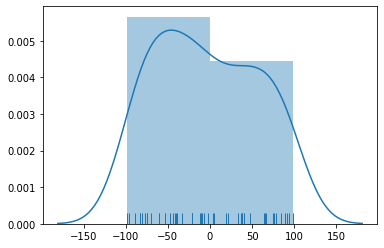

In [138]:
import seaborn as sns

sns.distplot(np.random.randint(-100, 100, 50), rug=True)

<AxesSubplot:>

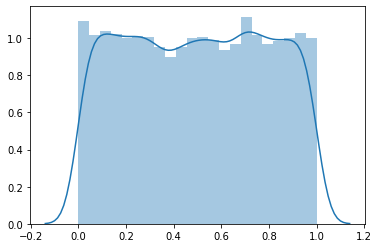

In [142]:
x = np.random.rand(10000)
sns.distplot(x)

<AxesSubplot:>

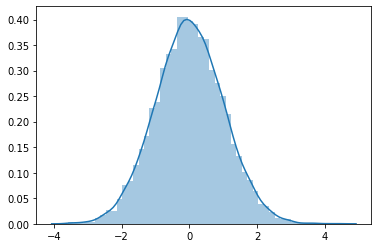

In [143]:
x = np.random.randn(10000)
sns.distplot(x)

In [144]:
np.unique([1,1,2,2,3,3])

array([1, 2, 3])

In [147]:
a = np.array([[1, 2, 3], [4, 2, 1]])
np.unique(a)

array([1, 2, 3, 4])

In [148]:
a = np.array(['a', 'b', 'b', 'c', 'a'])
np.unique(a, return_counts=True)

(array(['a', 'b', 'c'], dtype='<U1'), array([2, 2, 1]))

In [159]:
unique_values, index, cnt = np.unique(a, return_index=True, return_counts=True)

In [160]:
print(unique_values, index, cnt)

['a' 'b' 'c'] [0 1 3] [2 2 1]


In [161]:
np.bincount([1,1,2,2,4,4], minlength=10)

array([0, 2, 2, 0, 2, 0, 0, 0, 0, 0])

In [162]:
u, indices = np.unique(a, return_inverse=True)
u

array(['a', 'b', 'c'], dtype='<U1')

In [163]:
indices

array([0, 1, 1, 2, 0])

In [164]:
u[indices]

array(['a', 'b', 'b', 'c', 'a'], dtype='<U1')

In [170]:
x = np.random.randn(100)
print(x.mean(), x.std(), x.var())

-0.02269371700085122 1.0309757389825165 1.0629109743705458


In [174]:
n = 1000
(n, x.size)

(1000, 100)

In [192]:
x = np.random.randint(100, size=(100, 100))
x

array([[47, 57, 64, ..., 90, 92, 21],
       [20, 76, 90, ..., 57, 22, 78],
       [ 0, 34, 63, ...,  1, 97, 89],
       ...,
       [76,  0, 81, ...,  5, 69, 36],
       [45, 54,  4, ..., 89, 87, 84],
       [54, 99, 25, ...,  9, 60, 35]])

In [190]:
np.einsum("ij->ji", x)

array([[ 4, 23, 32, ..., 89, 77, 78],
       [92, 12, 19, ..., 95, 57, 79],
       [88, 10, 85, ..., 87, 88, 37],
       ...,
       [98, 30, 16, ..., 23, 46, 23],
       [22, 26,  5, ..., 62, 69, 80],
       [90,  2,  6, ..., 53, 34, 29]])

In [197]:
x = np.arange(1, 101).reshape(10, 10)
x

array([[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10],
       [ 11,  12,  13,  14,  15,  16,  17,  18,  19,  20],
       [ 21,  22,  23,  24,  25,  26,  27,  28,  29,  30],
       [ 31,  32,  33,  34,  35,  36,  37,  38,  39,  40],
       [ 41,  42,  43,  44,  45,  46,  47,  48,  49,  50],
       [ 51,  52,  53,  54,  55,  56,  57,  58,  59,  60],
       [ 61,  62,  63,  64,  65,  66,  67,  68,  69,  70],
       [ 71,  72,  73,  74,  75,  76,  77,  78,  79,  80],
       [ 81,  82,  83,  84,  85,  86,  87,  88,  89,  90],
       [ 91,  92,  93,  94,  95,  96,  97,  98,  99, 100]])

### np.einsum()

In [206]:
np.einsum("ij->ji", x)

array([[  1,  11,  21,  31,  41,  51,  61,  71,  81,  91],
       [  2,  12,  22,  32,  42,  52,  62,  72,  82,  92],
       [  3,  13,  23,  33,  43,  53,  63,  73,  83,  93],
       [  4,  14,  24,  34,  44,  54,  64,  74,  84,  94],
       [  5,  15,  25,  35,  45,  55,  65,  75,  85,  95],
       [  6,  16,  26,  36,  46,  56,  66,  76,  86,  96],
       [  7,  17,  27,  37,  47,  57,  67,  77,  87,  97],
       [  8,  18,  28,  38,  48,  58,  68,  78,  88,  98],
       [  9,  19,  29,  39,  49,  59,  69,  79,  89,  99],
       [ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100]])

In [207]:
np.einsum("ij->", x)

5050

In [208]:
np.einsum("ij->j", x)

array([460, 470, 480, 490, 500, 510, 520, 530, 540, 550])

In [209]:
np.einsum("ij->i", x)

array([ 55, 155, 255, 355, 455, 555, 655, 755, 855, 955])